In [5]:
import numpy as np
# import matplotlib.pyplot as plt
import robosuite as suite

from PIL import Image
from IPython.display import display
import imageio
from robosuite.utils.transform_utils import *
from robosuite.utils.placement_samplers import UniformRandomSampler
from robosuite.utils.mjcf_utils import CustomMaterial
from robosuite.models.objects import BoxObject

import h5py

In [2]:
table_offset=np.array((0, 0, 1.2))

# initialize objects of interest
tex_attrib = {
    "type": "cube",
}
mat_attrib = {
    "texrepeat": "1 1",
    "specular": "0.4",
    "shininess": "0.1",
}
redwood = CustomMaterial(
    texture="WoodRed",
    tex_name="redwood",
    mat_name="redwood_mat",
    tex_attrib=tex_attrib,
    mat_attrib=mat_attrib,
)


cube = BoxObject(
    name="cube",
    size_min=[0.020, 0.020, 0.020],  # [0.015, 0.015, 0.015],
    size_max=[0.022, 0.022, 0.022],  # [0.018, 0.018, 0.018])
    rgba=[1, 0, 0, 1],
    material=redwood,
)


placement_initializer = UniformRandomSampler(
                name="ObjectSampler",
                mujoco_objects= cube,
                x_range=[-0.02, -0.02],
                y_range=[0.08, 0.08],
                rotation=0,
                ensure_object_boundary_in_range=False,
                ensure_valid_placement=True,
                reference_pos= table_offset,
                z_offset=0.03,
            )

In [3]:
env = suite.make(
    env_name="Lift",
    robots="Sawyer",
    has_renderer=False,
    ignore_done=True,
    use_camera_obs=True,
    camera_names="frontview",
    # table_full_size=(0.8, 0.8, 0.2)
    table_offset=np.array((0, 0, 0.96)),
    placement_initializer=placement_initializer,
)

In [4]:
env.reset()
pass

In [12]:
fn='/home/ns/wreg/matlab/sawyer_experiments/jps.csv'
fn='/home/ns/wreg/matlab/sawyer_experiments/jps2.csv'
fn='/home/ns/wreg/matlab/sawyer_experiments/jps3.csv'

#read csv using numpy
import numpy as np
data=np.genfromtxt(fn,delimiter=',',skip_header=1)[:, 1:8]

actions=data[::-1] #weired reason
actions.shape

(159, 7)

In [9]:
dataset_dir="/home/ns/data_sawyer" 
dataset_path=dataset_dir+"/reach/july6/sawyer_pick3.h5"

f = h5py.File(dataset_path, "r")
demos = list(f["data"].keys())
num_demos = len(demos)
print("hdf5 file {} has {} demonstrations".format(dataset_path, num_demos))


demo_name="demo_1"
demo=f["data"][demo_name]
actions_real=demo['actions']
actions_real.shape

hdf5 file /home/ns/data_sawyer/reach/july6/sawyer_pick3.h5 has 60 demonstrations


(59, 7)

In [10]:
fp='/home/ns/sawyer_sim_real/actions_p4.npy'
actions_pred=np.load(fp)
actions_pred.shape

(59, 7)

In [11]:
def vel_gotopos(target, kp=0.3):
    cpos=env.sim.data.qpos[:7]
    dpos=target-cpos
    while np.linalg.norm(dpos)>0.1:
        cpos=env.sim.data.qpos[:7]
        dpos=target-cpos
        a=dpos*kp
        action=np.zeros(8)
        action[:7]=a
        env.step(action) 

def gripper_close(n=15):
    action = np.zeros(8)
    for i in range(n):
        action[-1] = 0.1  #close
        env.step(action) 
        
def gripper_open(n=15):
    action = np.zeros(8)
    for i in range(n):
        action[-1] = -0.1  
        env.step(action) 

def render_views(camera_names=['frontview', 'robot0_eye_in_hand']):
    views=[env.sim.render(height=256, width=256, camera_name=name)[::-1] for name in camera_names]
    view=np.concatenate(views, axis=1)
    return view

In [12]:
actions=actions_real

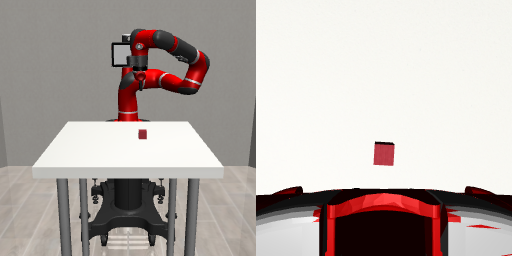

In [13]:
vel_gotopos(actions[0])
v=render_views()
display(Image.fromarray(v))

In [14]:
gripper_open()

In [15]:
data=actions_pred

In [16]:
writer = imageio.get_writer("hello_sawyer_play.mp4", fps=20)

for pos in data:
    vel_gotopos(pos, kp=0.5)
    view=render_views() 
    writer.append_data(view)


action = np.zeros(8)
for i in range(10):
    action[-1] = 0.1  #close
    env.step(action)
    view=render_views() 
    writer.append_data(view)

for pos in data[::-1][10:]:
    vel_gotopos(pos, kp=0.5)
    view=render_views() 
    writer.append_data(view)


writer.close()
    

KeyboardInterrupt: 

In [17]:
writer.close()

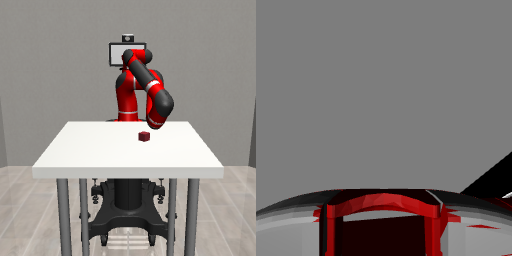

In [18]:
v=render_views()
display(Image.fromarray(v))
# plt.imshow(v)

In [19]:
env.close()

In [15]:
# camera" names = ('frontview', 'birdview', 'agentview', 'sideview', 'robot0_robotview', 'robot0_eye_in_hand'

In [15]:
# env.placement_initializer.sample(reference=[-0.6,0.5,0])
env.reset()
pass 